<a href="https://www.kaggle.com/code/kamalapousajja/spark-funds-investment-analysis?scriptVersionId=148721728" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Spark Funds Investment Analysis ~ 

**Introduction:**

We have been approached by Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

**Investment Details:**

* Spark Funds wants to invest between 5 to 15 million USD per round of investment.
* Spark Funds wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.
* Spark Funds wants to choose one of these four investment types(venture, angel, seed, and private equity) for each potential investment they will make. 

**Business objective:**

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.


In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spark-funds-investment-data/rounds2.csv
/kaggle/input/spark-funds-investment-data/companies.txt
/kaggle/input/spark-funds-investment-data/mapping.csv


In [3]:
#Read dataset, changing the encoding type because of special characters. And then solving the multiple encoding issue.

companies = pd.read_csv("/kaggle/input/spark-funds-investment-data/companies.txt",encoding="ISO-8859-1", sep="\t")
rounds2 = pd.read_csv("/kaggle/input/spark-funds-investment-data/rounds2.csv",encoding="ISO-8859-1")

In [4]:
#Inspect the dataframe

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


# Data Cleaning

In [5]:
#As seen above the columns 'permalink' and 'name' still has encoding issue, we need to encode the column with 'utf-8' encoding and then decode by 'ascii'

companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore').str.lower()

companies['name'] = companies['name'].str.encode('utf-8').str.decode('ascii', 'ignore').str.lower()

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
#Inspect the 'round2' dataframe

rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
# The 'rounds2' dataframe also has the same encoding issue.

rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore').str.lower()

rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
#Shape of the 'companies' dataframe

companies.shape

(66368, 10)

In [9]:
#Check the data type

companies.dtypes

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object

In [10]:
#Getting to know the Information of the 'companies' dataframe

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [11]:
#Check missing values

companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [12]:
#Statistical description 

companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66037,61191,27296,4,137,311,1092,5111,3978
top,/organization/-fame,roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [13]:
#Shape of the 'rounds2' dataframe

rounds2.shape

(114949, 6)

In [14]:
#Check the data type

rounds2.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [15]:
#Getting to know the Information of the 'round2' dataframe

rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [16]:
#Check missing values

rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [17]:
#Statistical description 

rounds2.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,66368,114949,14,8,5033,NaN
top,/organization/solarflare,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,A,01-01-2014,NaN
freq,19,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


In [18]:
#Find the total number of unique companies in the'rounds2' dataframe?

len(rounds2['company_permalink'].unique())

66368

In [19]:
#Find the total number of unique companies in the'companies' dataframe?

len(companies['permalink'].unique())

66368

In [20]:
#Find the companies in the 'rounds2' dataframe which are NOT present in 'companies' dataframe

round2_unique = pd.DataFrame(rounds2['company_permalink'].unique())
companies_unique = pd.DataFrame(companies['permalink'].unique())
companies_unique.equals(round2_unique)

True

In [21]:
#Merge two dataframes 

master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')

master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [22]:
#Find how many observations that are present in the 'master_frame' dataframe

master_frame.shape

(114949, 16)

In [23]:
#Getting to know the Information of the 'master_frame' dataframe

master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [24]:
#Check missing values

master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [25]:
#Change the total number of missing values into percentage

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [26]:
#Drop the unnecessary columns

master_frame = master_frame.drop(['funding_round_code', 
                                  'funding_round_permalink', 
                                  'funded_at',
                                  'permalink', 
                                  'homepage_url',
                                  'founded_at'], axis = 1)

In [27]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai
1,/organization/-qounter,venture,NaN,:qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
2,/organization/-qounter,seed,700000.0,:qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(the) one of them,inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing


In [28]:
#Check missing values

round(100*(master_frame.isnull().sum()/len(master_frame.index)) ,2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
status                 0.00
country_code           7.55
state_code             9.52
region                 8.84
city                   8.84
dtype: float64

In [29]:
#Drop the rows that have missing values for'raised_amount_usd' column

master_frame.dropna(subset = ['raised_amount_usd'], inplace = True)

In [30]:
#Check missing values again

round(100*(master_frame.isnull().sum()/len(master_frame.index)) ,2)

company_permalink     0.00
funding_round_type    0.00
raised_amount_usd     0.00
name                  0.00
category_list         1.10
status                0.00
country_code          6.16
state_code            8.01
region                7.42
city                  7.42
dtype: float64

In [31]:
master_frame.shape

(94959, 10)

In [32]:
#Find the '0' values from the 'raised_amount_usd' column

master_frame[master_frame['raised_amount_usd'] == 0]

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city
324,/organization/2nd-chance-solutions,equity_crowdfunding,0.0,2nd chance solutions,Health and Wellness,operating,USA,IL,Chicago,Lockport
592,/organization/42,seed,0.0,42,Enterprise Software,operating,USA,CA,SF Bay Area,San Francisco
684,/organization/5-stars-vacation-rentals,equity_crowdfunding,0.0,5 stars vacation rentals,Real Estate|Travel,operating,USA,SC,Myrtle Beach,North Myrtle Beach
1032,/organization/a-d-propane,equity_crowdfunding,0.0,a & d propane,Hardware|Specialty Chemicals,operating,USA,TX,Houston,Conroe
1060,/organization/a-suite-salon,equity_crowdfunding,0.0,a suite salon,Real Estate,operating,USA,FL,Palm Beaches,Jupiter
...,...,...,...,...,...,...,...,...,...,...
113020,/organization/yondr-2,venture,0.0,yondr,Media,operating,BEL,13,NaN,NaN
113565,/organization/zapier,seed,0.0,zapier,Cloud Computing|Data Integration|SaaS|Software,operating,USA,CA,SF Bay Area,Mountain View
114305,/organization/zinger-digital-signs,convertible_note,0.0,zinger digital signs,Consulting|Enterprise Software,operating,USA,FL,Ft. Lauderdale,Fort Lauderdale
114520,/organization/zolvers,seed,0.0,zolvers,Marketplaces|Services,operating,ARG,7,Buenos Aires,Buenos Aires


In [33]:
#Drop the '0' values from the 'raised_amunt_usd' column

master_frame.drop(master_frame[master_frame['raised_amount_usd'] == 0].index, inplace = True)

In [34]:
#Find the '0' values from the 'raised_amount_usd' column again

master_frame[master_frame['raised_amount_usd'] == 0]

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city


In [35]:
master_frame.shape

(94544, 10)

# Funding Type Analysis

In [36]:
#Observe the unique data of the'funding_round_type' column

master_frame['funding_round_type'].value_counts()

funding_round_type
venture                  50199
seed                     23508
debt_financing            6656
angel                     4829
grant                     2122
private_equity            1933
undisclosed               1566
convertible_note          1423
equity_crowdfunding       1046
post_ipo_equity            628
product_crowdfunding       382
post_ipo_debt              152
non_equity_assistance       70
secondary_market            30
Name: count, dtype: int64

In [37]:
#Convert $ to million $.

master_frame['raised_amount_usd'] = round((master_frame['raised_amount_usd']/1000000), 2)

master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,venture,10.00,#fame,Media,operating,IND,16,Mumbai,Mumbai
2,/organization/-qounter,seed,0.70,:qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/organization/-the-one-of-them-inc-,venture,3.41,"(the) one of them,inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/organization/0-6-com,venture,2.00,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
6,/organization/01games-technology,undisclosed,0.04,01games technology,Games,operating,HKG,NaN,Hong Kong,Hong Kong


In [38]:
#Find the average investment amount of each funding type

average_funding = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False).reset_index()
average_funding

,funding_round_type,raised_amount_usd
0,post_ipo_debt,168.704539
1,post_ipo_equity,82.182532
2,secondary_market,79.649333
3,private_equity,73.422349
4,undisclosed,19.438895
5,debt_financing,17.110072
6,venture,11.755726
7,grant,4.304510
8,convertible_note,1.477850
9,product_crowdfunding,1.377513


Text(0, 0.5, 'Funding type')

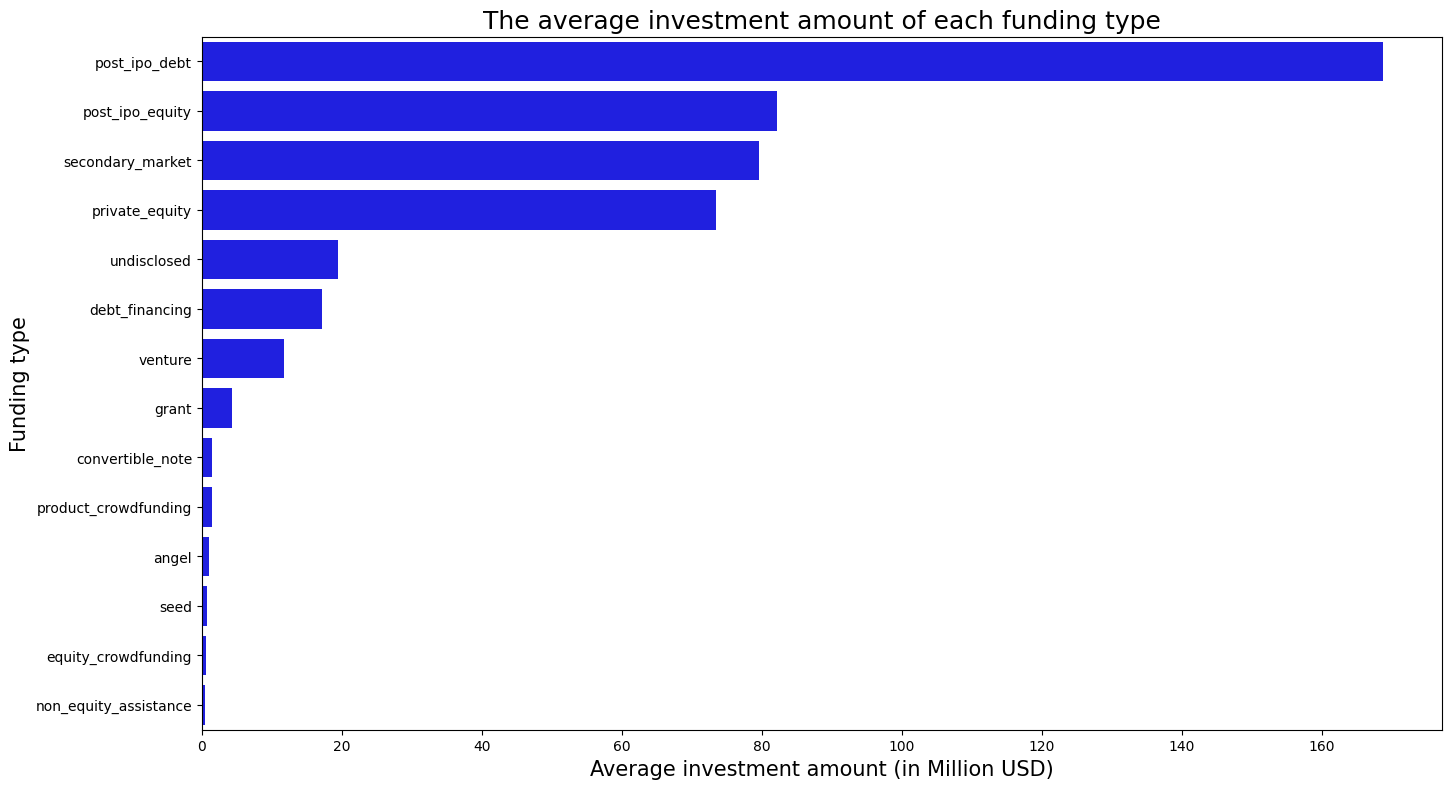

In [39]:
#Visualisation

plt.figure(figsize = (16,9))

sns.barplot(data = average_funding,
            x = 'raised_amount_usd', 
            y = 'funding_round_type', 
            color = 'blue'
           )

plt.title('The average investment amount of each funding type',fontsize = 18)
plt.xlabel('Average investment amount (in Million USD)',fontsize = 15)
plt.ylabel('Funding type',fontsize = 15)

> Spark Funds is mainly concerned with 4 types of Investment: 
> Seed, Angel, Venture, and Private Equity. 

> So we will filter our results.

In [40]:
#Find average investment amount of the 4 funding types.

funding_seclected = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().loc[['venture','angel','seed','private_equity']].sort_values(ascending = False).reset_index()

funding_seclected

,funding_round_type,raised_amount_usd
0,private_equity,73.422349
1,venture,11.755726
2,angel,0.964730
3,seed,0.722663


Text(0, 0.5, 'Funding type')

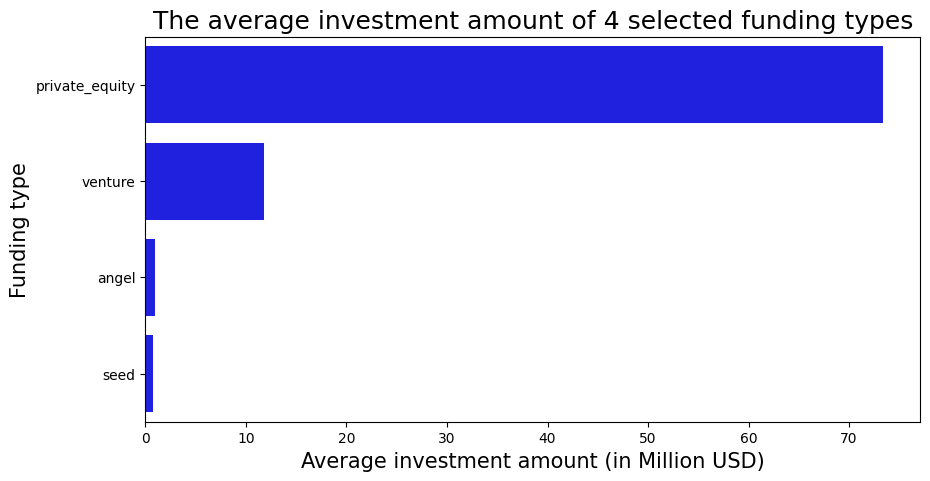

In [41]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(data = funding_seclected,
            y = 'funding_round_type', 
            x = 'raised_amount_usd', 
            color = 'blue'
           )

plt.title('The average investment amount of 4 selected funding types',fontsize = 18)
plt.xlabel('Average investment amount (in Million USD)',fontsize = 15)
plt.ylabel('Funding type',fontsize = 15)

> Base on the constraints applied by Sparks Funds we can say that only 'venture' funding type's investment amount is between 5 million and 15 million

# Country Analysis

In [42]:
#Filter master_frame and selected only 'venture' data

venture_frame = master_frame[master_frame['funding_round_type'] == 'venture']

venture_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,venture,10.00,#fame,Media,operating,IND,16,Mumbai,Mumbai
3,/organization/-the-one-of-them-inc-,venture,3.41,"(the) one of them,inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/organization/0-6-com,venture,2.00,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,venture,0.72,ondine biomedical inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,venture,20.00,h2o.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View


> Spark Funds wants to see the top nine countries which have received the highest total funding



In [43]:
#Find the top9 funded countries

top9 = venture_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False).head(9).reset_index()

top9

,country_code,raised_amount_usd
0,USA,422510.47
1,CHN,39835.29
2,GBR,20245.59
3,IND,14391.91
4,CAN,9583.32
5,FRA,7259.50
6,ISR,6907.50
7,DEU,6347.04
8,JPN,3363.70


Text(0, 0.5, 'Country')

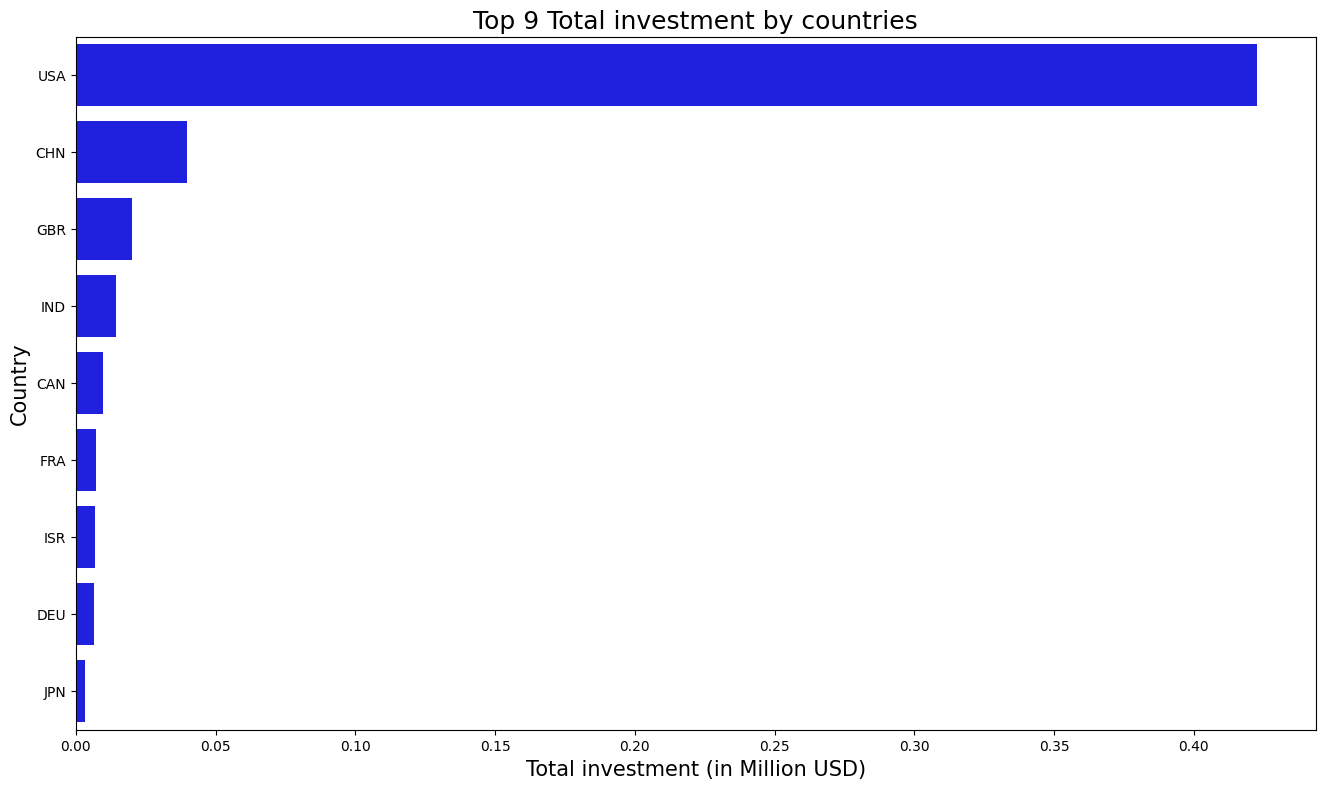

In [44]:
#Visualisation

plt.figure(figsize = (16,9))

sns.barplot(data = top9,
            y = 'country_code', 
            x = top9['raised_amount_usd']/1000000, 
            color = 'blue'
           )

plt.title('Top 9 Total investment by countries',fontsize = 18)
plt.xlabel('Total investment (in Million USD)',fontsize = 15)
plt.ylabel('Country',fontsize = 15)

> SparksFunds wants to invest in only top three English speaking countries.

In [45]:
Eng_speaking_country=pd.DataFrame({'country_code': ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'],
                        'English_Speaking_Flag': ['Yes','No','Yes','Yes','Yes','No','Yes','No','No']})

top9 = pd.merge(top9,Eng_speaking_country,how='inner',on='country_code')

top9

,country_code,raised_amount_usd,English_Speaking_Flag
0,USA,422510.47,Yes
1,CHN,39835.29,No
2,GBR,20245.59,Yes
3,IND,14391.91,Yes
4,CAN,9583.32,Yes
5,FRA,7259.50,No
6,ISR,6907.50,Yes
7,DEU,6347.04,No
8,JPN,3363.70,No


Text(0.5, 0, 'Country')

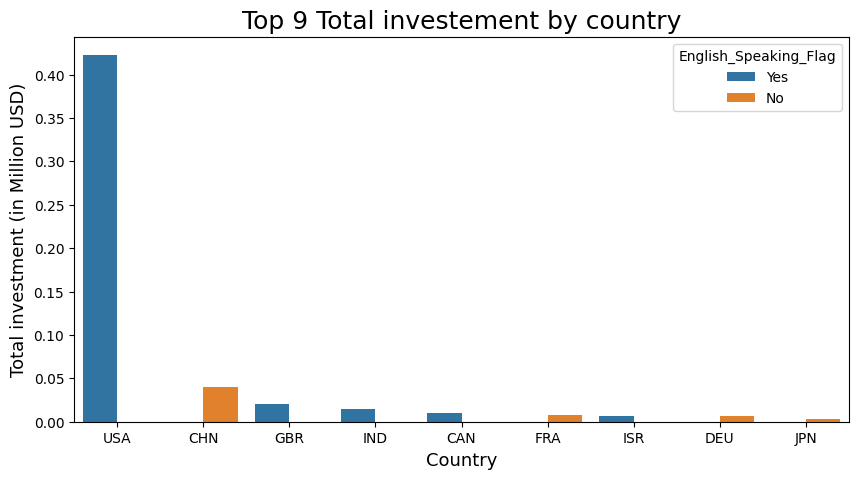

In [46]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(data = top9,
            x = 'country_code',
            y = top9['raised_amount_usd']/1000000,
            hue = 'English_Speaking_Flag'
           )

plt.title('Top 9 Total investement by country',fontsize = 18)
plt.ylabel('Total investment (in Million USD)',fontsize = 13)
plt.xlabel('Country',fontsize = 13)

> SparksFunds wants to invest in only top three English speaking countries.

> So, the top 3 english speaking companies are for our analysis are - USA,GBR,IND

# Sector Analysis

In [47]:
venture_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,venture,10.00,#fame,Media,operating,IND,16,Mumbai,Mumbai
3,/organization/-the-one-of-them-inc-,venture,3.41,"(the) one of them,inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/organization/0-6-com,venture,2.00,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,venture,0.72,ondine biomedical inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,venture,20.00,h2o.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View


In [48]:
#Investigating the 'category_list' column

venture_frame['category_list'].value_counts()

category_list
Biotechnology                                 5512
Software                                      4068
Health Care                                   1390
Clean Technology                              1318
Enterprise Software                           1184
                                              ... 
Market Research|Semantic Search|Video            1
Assisted Living|Elder Care|Health Care           1
New Technologies                                 1
Advertising|Marketing Automation|Software        1
Diagnostics|Investment Management|Services       1
Name: count, Length: 10552, dtype: int64

> Above, in the list of categories present in 'category_list', we see that for some categories, there are multiple categories separated by the symbol '|'. For those kind of categories, we need to extract the Primary categories; i.e the category which has been listed first.


In [49]:
#Extract the primary sector value into category_list column. 
#According to the business rule the first string before the vertical bar will be considered the primary sector.

venture_frame['primary_sector'] = venture_frame['category_list'].str.split('|').str[0]

venture_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,venture,10.00,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
3,/organization/-the-one-of-them-inc-,venture,3.41,"(the) one of them,inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,venture,2.00,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
8,/organization/0ndine-biomedical-inc,venture,0.72,ondine biomedical inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology
10,/organization/0xdata,venture,20.00,h2o.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics


In [50]:
venture_frame['primary_sector'].value_counts()

primary_sector
Biotechnology           6940
Software                4212
Advertising             2269
Health Care             1842
Enterprise Software     1801
                        ... 
High Schools               1
High School Students       1
Mens Specific              1
Cloud-Based Music          1
Task Management            1
Name: count, Length: 607, dtype: int64

> Map each primary sector to one of the eight main sectors
> Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 
> (Note that ‘Others’ is also considered one of the main sectors)

In [51]:
#Read the 'mapping.csv' file 

mapping = pd.read_csv('/kaggle/input/spark-funds-investment-data/mapping.csv')

mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [52]:
mapping['category_list'] = mapping['category_list'].str.replace('0','na')

mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [53]:
mapping.shape

(688, 10)

In [54]:
#Check missing values

mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [55]:
#Drop missing values

mapping = mapping.dropna()

In [56]:
#Check missing values again

mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [57]:
mapping.shape

(687, 10)

In [58]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [59]:
#Reshaping the 'mapping' dataframe to merge with the 'master_frame' dataframe. 
#Using melt() function to unpivot the table.

mapping = mapping.melt(id_vars='category_list',var_name='main_sectors')

mapping.head()

,category_list,main_sectors,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


> We see that the dataframe mapping has been converted into a long format dataframe.

> But the values in the 'category_list' column appear repetitvely. 
> So, we need to drop the rows having value = 0 to remove duplicates.

In [60]:
#Map the category_list to main_sectors where value is not = 0

mapping = mapping[~(mapping['value']==0)]

mapping

,category_list,main_sectors,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6113,Social Television,"Social, Finance, Analytics, Advertising",1
6114,Social Travel,"Social, Finance, Analytics, Advertising",1
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [61]:
#Dropping the 'value' column as its unnecessary for our analysis.

mapping = mapping.drop('value', axis = 1)

mapping.head()

,category_list,main_sectors
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [62]:
mapping.shape

(687, 2)

> Above, we can see that the number of rows in mapping is 687, which matches the previous count of rows prior to melting. Therefore, the dataframe mapping has been successfully changed from a wide-format to a long-format.

> Next, we need to merge the mapping dataframe to the venture_frames dataframe with each primary sector mapped to its main sector 

In [63]:
venture_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,venture,10.00,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
3,/organization/-the-one-of-them-inc-,venture,3.41,"(the) one of them,inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,venture,2.00,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
8,/organization/0ndine-biomedical-inc,venture,0.72,ondine biomedical inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology
10,/organization/0xdata,venture,20.00,h2o.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics


In [64]:
mapping.head()

,category_list,main_sectors
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [65]:
#Merge the 'venture_frame' dataframe and 'mapping' dataframe

venture_mapping_frame = venture_frame.merge(mapping, how = 'left', on ='category_list')

venture_mapping_frame

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sectors
0,/organization/-fame,venture,10.00,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/-the-one-of-them-inc-,venture,3.41,"(the) one of them,inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,Apps,NaN
2,/organization/0-6-com,venture,2.00,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging"
3,/organization/0ndine-biomedical-inc,venture,0.72,ondine biomedical inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors
4,/organization/0xdata,venture,20.00,h2o.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...,...,...,...,...
50194,/organization/zyraz-technology,venture,7.99,zyraz technology,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,Biotechnology,Cleantech / Semiconductors
50195,/organization/zyrra,venture,0.14,zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge,E-Commerce,Others
50196,/organization/zystor,venture,8.50,zystor,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,Biotechnology,Cleantech / Semiconductors
50197,/organization/zytoprotec,venture,2.69,zytoprotec,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,Biotechnology,Cleantech / Semiconductors


In [66]:
venture_mapping_frame.shape

(50199, 12)

In [67]:
venture_mapping_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd         0
name                      0
category_list           498
status                    0
country_code           2115
state_code             2859
region                 2710
city                   2710
primary_sector          498
main_sectors          23135
dtype: int64

In [68]:
venture_mapping_frame['main_sectors'].value_counts()

main_sectors
Others                                     8379
Cleantech / Semiconductors                 7848
Health                                     2616
News, Search and Messaging                 2412
Social, Finance, Analytics, Advertising    2326
Manufacturing                              1982
Entertainment                              1284
Automotive & Sports                         217
Name: count, dtype: int64

> Sector Analysis Strategy 
> Now we have a data frame with each company’s main sector (main_sectors) mapped to it. 
> 
> When we say sector analysis, we refer to one of the eight main sectors.
> 
> Also, we know the top three English speaking countries and the most suitable funding type for Spark Funds. 
> 
> Let’s call the three countries 'D1' = USA, 'D2' = GBR and 'D3' = IND 
> 

In [69]:
#Create D1 dataframe for country_code = USA

D1 = venture_mapping_frame[(venture_mapping_frame['country_code'] == 'USA') & 
             (venture_mapping_frame['raised_amount_usd'] >= 5) & 
             (venture_mapping_frame['raised_amount_usd'] <= 15)]

D1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sectors
6,/organization/0xdata,venture,8.9,h2o.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
7,/organization/1-mainstream,venture,5.0,1 mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps,NaN
33,/organization/128-technology,venture,12.0,128 technology,Service Providers|Technology,operating,USA,MA,Boston,Burlington,Service Providers,NaN
37,/organization/1366-technologies,venture,15.0,1366 technologies,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,Manufacturing
38,/organization/1366-technologies,venture,5.0,1366 technologies,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,Manufacturing


In [70]:
#Create D2 dataframe for country_code = GBR

D2 = venture_mapping_frame[(venture_mapping_frame['country_code'] == 'GBR') & 
             (venture_mapping_frame['raised_amount_usd'] >= 5) & 
             (venture_mapping_frame['raised_amount_usd'] <= 15)]

D2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sectors
161,/organization/365scores,venture,5.50,365scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,Android,NaN
357,/organization/7digital,venture,8.47,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,Content Creators,NaN
358,/organization/7digital,venture,10.00,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,Content Creators,NaN
387,/organization/90min,venture,15.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,NaN
388,/organization/90min,venture,5.80,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,NaN


In [71]:
#Create D3 dataframe for country_code = IND

D3 = venture_mapping_frame[(venture_mapping_frame['country_code'] == 'IND') & 
             (venture_mapping_frame['raised_amount_usd'] >= 5) & 
             (venture_mapping_frame['raised_amount_usd'] <= 15)]

D3.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sectors
0,/organization/-fame,venture,10.00,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
84,/organization/21diamonds-india,venture,6.37,21diamonds,E-Commerce,operating,IND,10,New Delhi,Gurgaon,E-Commerce,Others
423,/organization/a-little-world,venture,6.41,a little world,Finance,operating,IND,16,Mumbai,Mumbai,Finance,"Social, Finance, Analytics, Advertising"
1217,/organization/adlabs-imagica,venture,8.18,adlabs imagica,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,Entertainment,NaN
1658,/organization/agile,venture,5.74,agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,Finance,NaN


In [72]:
#Find total number of investment count 

print(" Total investment count for USA(D1):",D1.raised_amount_usd.count())

print("\n","Total investment count for GBR(D2):",D2.raised_amount_usd.count())

print("\n","Total investment count for IND(D3):",D3.raised_amount_usd.count())

 Total investment count for USA(D1): 12182

 Total investment count for GBR(D2): 629

 Total investment count for IND(D3): 330


In [73]:
# Total amount of investment (USD)

print("Total amount invested in USA (D1):",D1.raised_amount_usd.sum())

print("\n","Total amount invested in GBR (D2):",D2.raised_amount_usd.sum())

print("\n","Total amount invested in IND (D3):",D3.raised_amount_usd.sum())

Total amount invested in USA (D1): 108791.45999999999

 Total amount invested in GBR (D2): 5451.84

 Total amount invested in IND (D3): 2976.55


In [74]:
#Find the top main sectors based on count on investment for USA

USA_sectors = D1.groupby('main_sectors')['raised_amount_usd'].count().sort_values(ascending = False).reset_index()

USA_sectors

,main_sectors,raised_amount_usd
0,Others,2076
1,Cleantech / Semiconductors,1741
2,Health,605
3,"News, Search and Messaging",552
4,"Social, Finance, Analytics, Advertising",529
5,Manufacturing,414
6,Entertainment,198
7,Automotive & Sports,40


Text(0, 0.5, 'Main sectors')

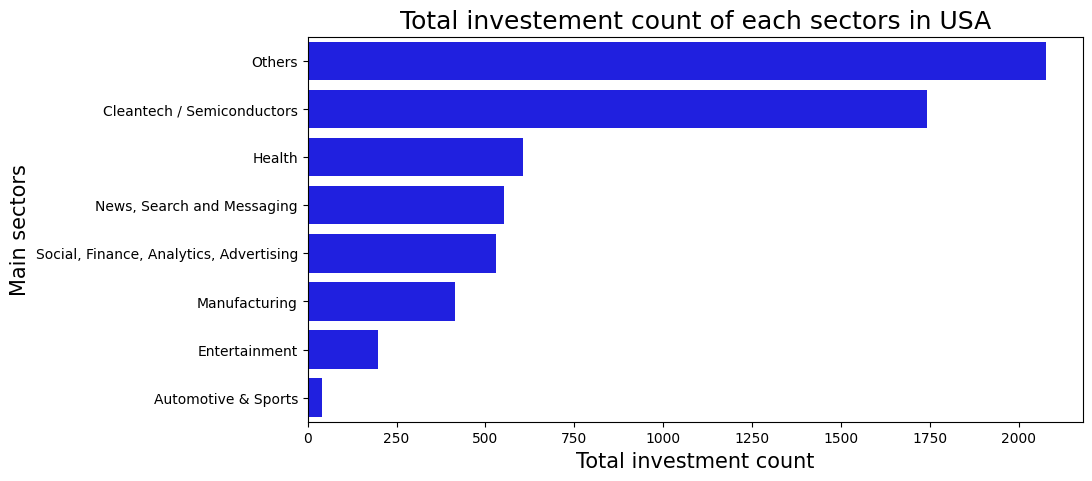

In [75]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(data = USA_sectors,
            x = 'raised_amount_usd', 
            y = 'main_sectors', 
            color = 'blue'
           )

plt.title('Total investement count of each sectors in USA',fontsize = 18)
plt.xlabel('Total investment count',fontsize = 15)
plt.ylabel('Main sectors',fontsize = 15)

In [76]:
#Find the top main sectors based on count on investment for GBR

GBR_sectors = D2.groupby('main_sectors')['raised_amount_usd'].count().sort_values(ascending = False).reset_index()
GBR_sectors

,main_sectors,raised_amount_usd
0,Cleantech / Semiconductors,107
1,Others,107
2,"News, Search and Messaging",31
3,Entertainment,29
4,Manufacturing,29
5,"Social, Finance, Analytics, Advertising",24
6,Health,13
7,Automotive & Sports,3


Text(0, 0.5, 'Main sectors')

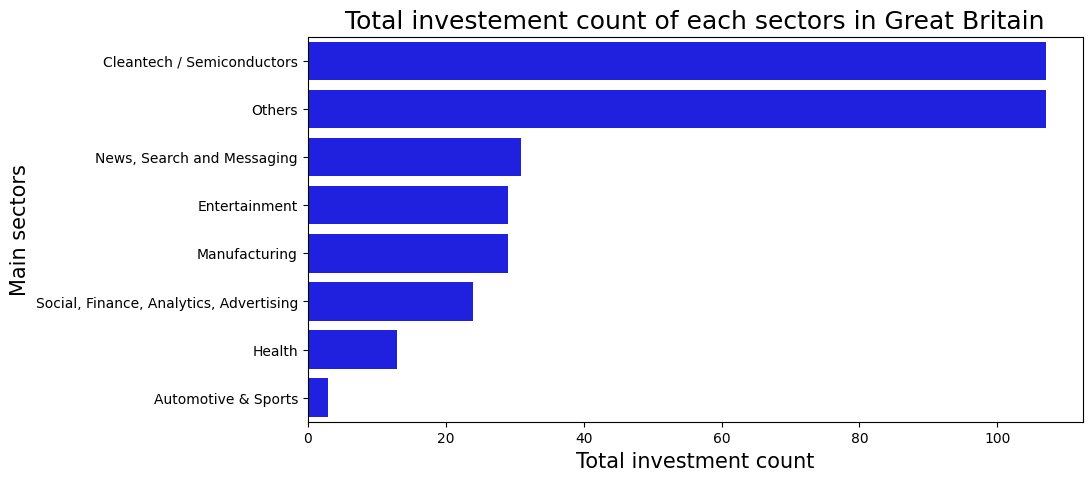

In [77]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(data = GBR_sectors,
            x = 'raised_amount_usd', 
            y = 'main_sectors',  
            color = 'blue'
           )

plt.title('Total investement count of each sectors in Great Britain',fontsize = 18)
plt.xlabel('Total investment count',fontsize = 15)
plt.ylabel('Main sectors',fontsize = 15)

In [78]:
#Find the top main sectors based on count on investment for IND

IND_sectors = D3.groupby('main_sectors')['raised_amount_usd'].count().sort_values(ascending = False).reset_index()
IND_sectors

,main_sectors,raised_amount_usd
0,Others,74
1,"News, Search and Messaging",31
2,"Social, Finance, Analytics, Advertising",22
3,Entertainment,19
4,Cleantech / Semiconductors,14
5,Health,13
6,Manufacturing,11
7,Automotive & Sports,2


Text(0, 0.5, 'Main sectors')

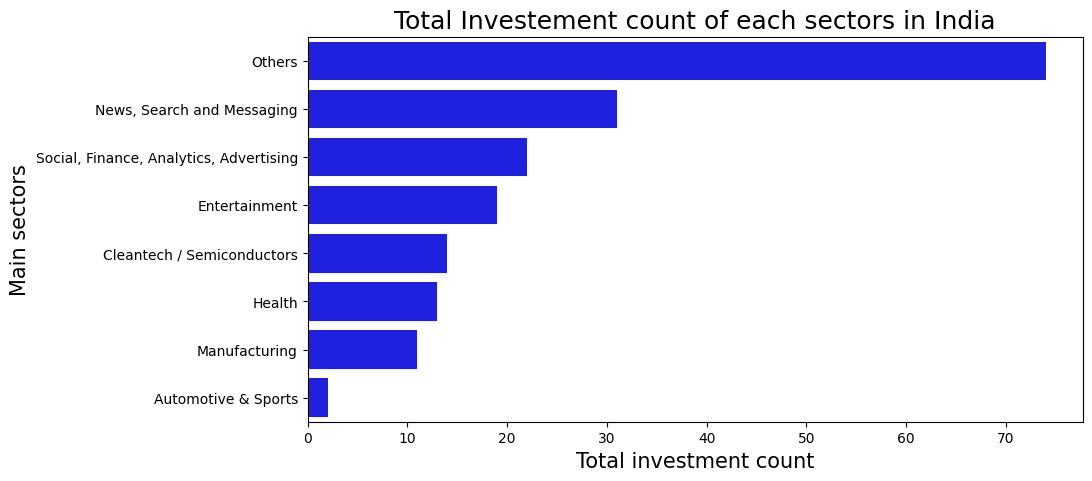

In [79]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(data = IND_sectors,
            x = 'raised_amount_usd', 
            y = 'main_sectors', 
            color = 'blue'
           )

plt.title('Total Investement count of each sectors in India',fontsize = 18)
plt.xlabel('Total investment count',fontsize = 15)
plt.ylabel('Main sectors',fontsize = 15)

In [80]:
#Find the Top Company to receive highest investment for the best performing sector in USA

USA_company = D1.where(D1.main_sectors == 'Others').groupby('name').raised_amount_usd.sum().sort_values(ascending = False).head(5).reset_index()
USA_company

,name,raised_amount_usd
0,virtustream,64.30
1,capella photonics,54.97
2,pmw technologies,54.89
3,approva,50.10
4,bit9,48.43


Text(0, 0.5, 'Company')

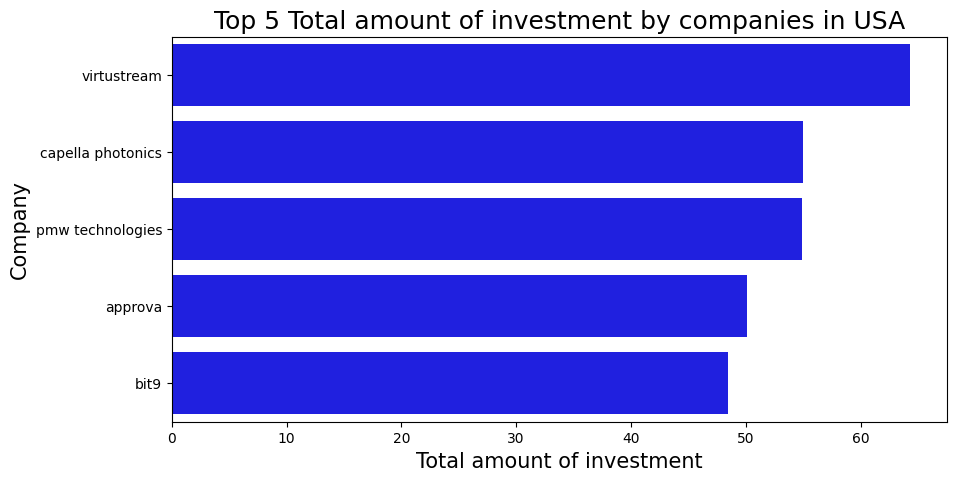

In [81]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(data = USA_company,
            x = 'raised_amount_usd', 
            y = 'name', 
            color = 'blue'
           )

plt.title('Top 5 Total amount of investment by companies in USA',fontsize = 18)
plt.xlabel('Total amount of investment',fontsize = 15)
plt.ylabel('Company',fontsize = 15)

In [82]:
#Find the Top Company to receive highest investment for the best performing sector in GBR

GBR_company = D2.where(D2.main_sectors == 'Others').groupby('name').raised_amount_usd.sum().sort_values(ascending = False).head(5).reset_index()
GBR_company

,name,raised_amount_usd
0,electric cloud,37.00
1,sensage,36.25
2,enigmatec,32.50
3,opencloud,27.97
4,myoptique group,27.70


Text(0, 0.5, 'Company')

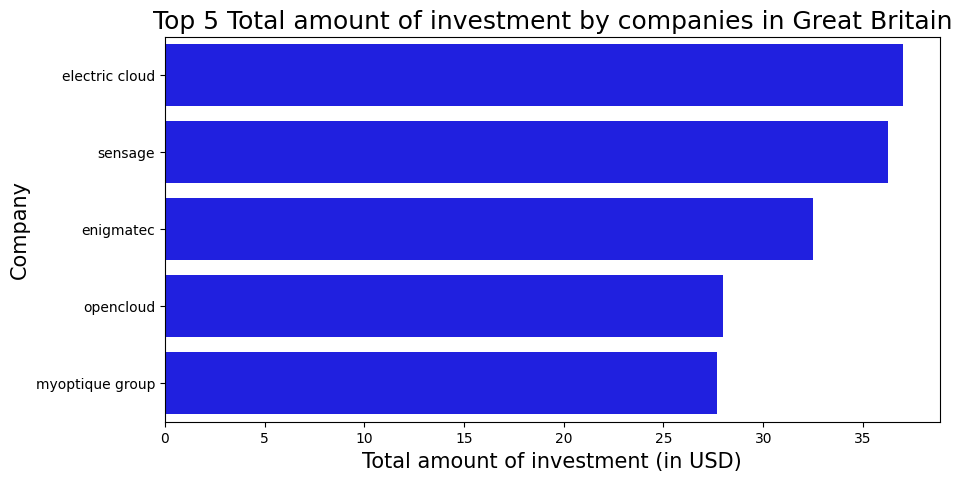

In [83]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(data = GBR_company,
            x = 'raised_amount_usd', 
            y = 'name', 
            color = 'blue'
           )

plt.title('Top 5 Total amount of investment by companies in Great Britain',fontsize = 18)
plt.xlabel('Total amount of investment (in USD)',fontsize = 15)
plt.ylabel('Company',fontsize = 15)

In [84]:
#Find the Top Company to receive highest investment for the best performing sector in IND

IND_company = D3.where(D3.main_sectors == 'Others').groupby('name').raised_amount_usd.sum().sort_values(ascending = False).head(5).reset_index()
IND_company

,name,raised_amount_usd
0,firstcry.com,39.0
1,myntra,38.0
2,commonfloor,32.9
3,pepperfry.com,28.0
4,itzcash card ltd.,25.0


Text(0, 0.5, 'Company')

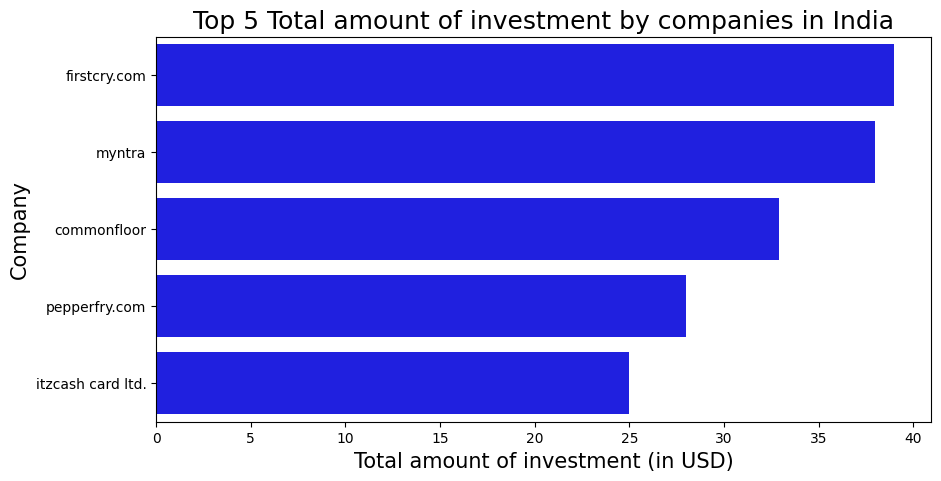

In [85]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(data = IND_company,
            x = 'raised_amount_usd', 
            y = 'name', 
            color = 'blue'
           )

plt.title('Top 5 Total amount of investment by companies in India',fontsize = 18)
plt.xlabel('Total amount of investment (in USD)',fontsize = 15)
plt.ylabel('Company',fontsize = 15)

In [86]:
#Find the Total amount of investment of 4 selected funding types

funding_seclected_sum = master_frame.groupby('funding_round_type')['raised_amount_usd'].sum().loc[['venture','angel','seed','private_equity']].sort_values(ascending = False).reset_index()

funding_seclected_sum

,funding_round_type,raised_amount_usd
0,venture,590125.71
1,private_equity,141925.40
2,seed,16988.36
3,angel,4658.68


Text(0, 0.5, 'Funding Type')

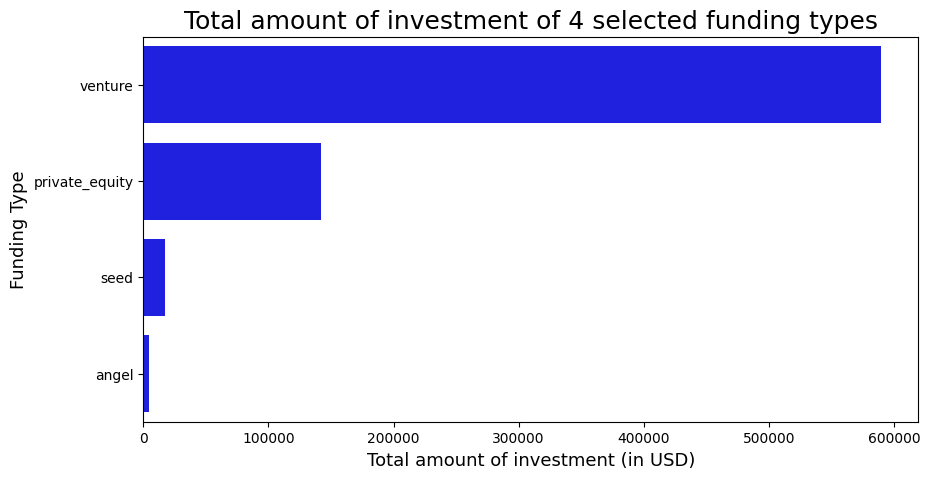

In [87]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(data = funding_seclected_sum,
            x = 'raised_amount_usd', 
            y = 'funding_round_type', 
            color = 'blue'
           )

plt.title('Total amount of investment of 4 selected funding types',fontsize = 18)
plt.xlabel('Total amount of investment (in USD)',fontsize = 13)
plt.ylabel('Funding Type',fontsize = 13)

In [88]:
#Find the top 3 sectors from USA based on Total Investment Count

USA_TIC = D1.groupby('main_sectors')['main_sectors'].count().rename('total_investment_count').sort_values(ascending = False).head(3).reset_index()

USA_TIC

,main_sectors,total_investment_count
0,Others,2076
1,Cleantech / Semiconductors,1741
2,Health,605


In [89]:
USA_TIC['Country'] = 'USA'
USA_TIC

,main_sectors,total_investment_count,Country
0,Others,2076,USA
1,Cleantech / Semiconductors,1741,USA
2,Health,605,USA


In [90]:
#Find the top 3 sectors from GBR based on Total Investment Count

GBR_TIC = D2.groupby('main_sectors')['main_sectors'].count().rename('total_investment_count').sort_values(ascending = False).head(3).reset_index()

GBR_TIC['Country'] = 'GBR'

GBR_TIC

,main_sectors,total_investment_count,Country
0,Cleantech / Semiconductors,107,GBR
1,Others,107,GBR
2,"News, Search and Messaging",31,GBR


In [91]:
#Find the top 3 sectors from India based on Total Investment Count

IND_TIC = D3.groupby('main_sectors')['main_sectors'].count().rename('total_investment_count').sort_values(ascending = False).head(3).reset_index()

IND_TIC['Country'] = 'India'

IND_TIC

,main_sectors,total_investment_count,Country
0,Others,74,India
1,"News, Search and Messaging",31,India
2,"Social, Finance, Analytics, Advertising",22,India


In [92]:
#Merge Total Investment Count of Top 3 countries

TIC = pd.merge(pd.merge(USA_TIC,GBR_TIC,how='outer'),IND_TIC,how='outer')

TIC

,main_sectors,total_investment_count,Country
0,Others,2076,USA
1,Cleantech / Semiconductors,1741,USA
2,Health,605,USA
3,Cleantech / Semiconductors,107,GBR
4,Others,107,GBR
5,"News, Search and Messaging",31,GBR
6,Others,74,India
7,"News, Search and Messaging",31,India
8,"Social, Finance, Analytics, Advertising",22,India


Text(0.5, 1.0, 'Total number of investments in the top 3 sectors of the top 3 countries')

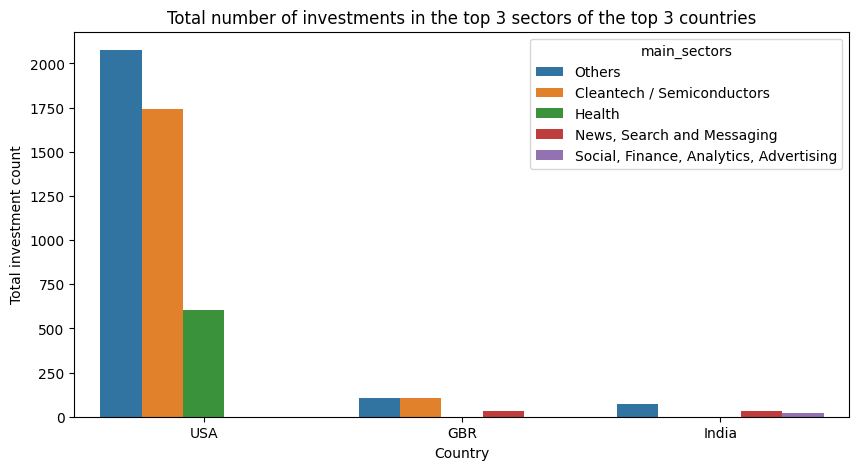

In [93]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(data = TIC,
            x = 'Country',
            y = 'total_investment_count',
            hue = 'main_sectors'
           )

plt.ylabel("Total investment count")
plt.xlabel("Country")
plt.title("Total number of investments in the top 3 sectors of the top 3 countries") 

> **Conclusion :**

> Based on the data analysis performed, SparksFunds should invest in :

> * Funding type - Venture.
> 
> * Countries - USA, Britain and India, respectively.
> 
> * Top two sectors to invest in are - Others and Cleantech / Semiconductors.